# Airline Ticket Pricing Prediction

The purpose of this project is to develop Machine Learning Models to predict Airline Ticket Prices for Test Dataset based on Training Dataset

## Data Pre-Processing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_excel('D:/tuansihan/06 Projects/02 Airline Ticket Pricing Prediction/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Identifying Missing Values

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since the number of missing values is minimal. These rows could be dropped.

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Since Date_of_Journey, Dep_Time & Arrival_Time columns are objects, we shall convert the datatype to datetime by running the codes below. This would allow the model to better understand the timestamp.

In [11]:
# Function that converts column datatype to datetime
def convert_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [12]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_to_datetime(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
# Create new columns for Day and Month
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-12-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-12-14 05:50:00,2021-12-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-12-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-12-14 18:05:00,2021-12-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-12-14 16:50:00,2021-12-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [17]:
# Drop Date_of_Journey column
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
# Functions to Extract Time
def get_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
    
def get_min(df,col):
    df[col+'_min'] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [19]:
# Extract Time from Dep_Time
get_hour(train_data,'Dep_Time')
get_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [20]:
# Extract Time from Arrival_Time
get_hour(train_data,'Arrival_Time')
get_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
duration = list(train_data['Duration'])

In [23]:
# Function to give duration a uniform format (h and min)
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:         # Check if value has 2 parts (h and min)
        pass
    else:
        if 'h' in duration[i]:                   # Check if value contains only h
            duration[i]=duration[i] + ' 00m'      
        else:
            duration[i]='0h '+ duration[i]       # Adds 0 h if no h in value
    

In [24]:
train_data['Duration'] = duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
# Extract Hour and Minute from Duration
def get_hour(x):
    return x.split(' ')[0][0:-1]
def get_min(x):
    return x.split(' ')[1][0:-1]

In [27]:
train_data['Duration_hour'] = train_data['Duration'].apply(get_hour)
train_data['Duration_min'] = train_data['Duration'].apply(get_min)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
drop_column(train_data,'Duration')

In [30]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour        object
Duration_min         object
dtype: object

In [31]:
# Convert Hour and Min to Int
train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_min'] = train_data['Duration_min'].astype(int)

In [32]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_min          int32
dtype: object

### Identify Categorical and Continuous Data

In [33]:
# Identifying Categorical Data
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
# Identifying Continuous Data
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hour',
 'Duration_min']

### Handling Categorical Data

In [35]:
## Nominal Data --> OneHotEncoder
## Ordinal Data --> LabelEncoder

In [36]:
cat_data = train_data[cat_col]
cat_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [37]:
cat_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

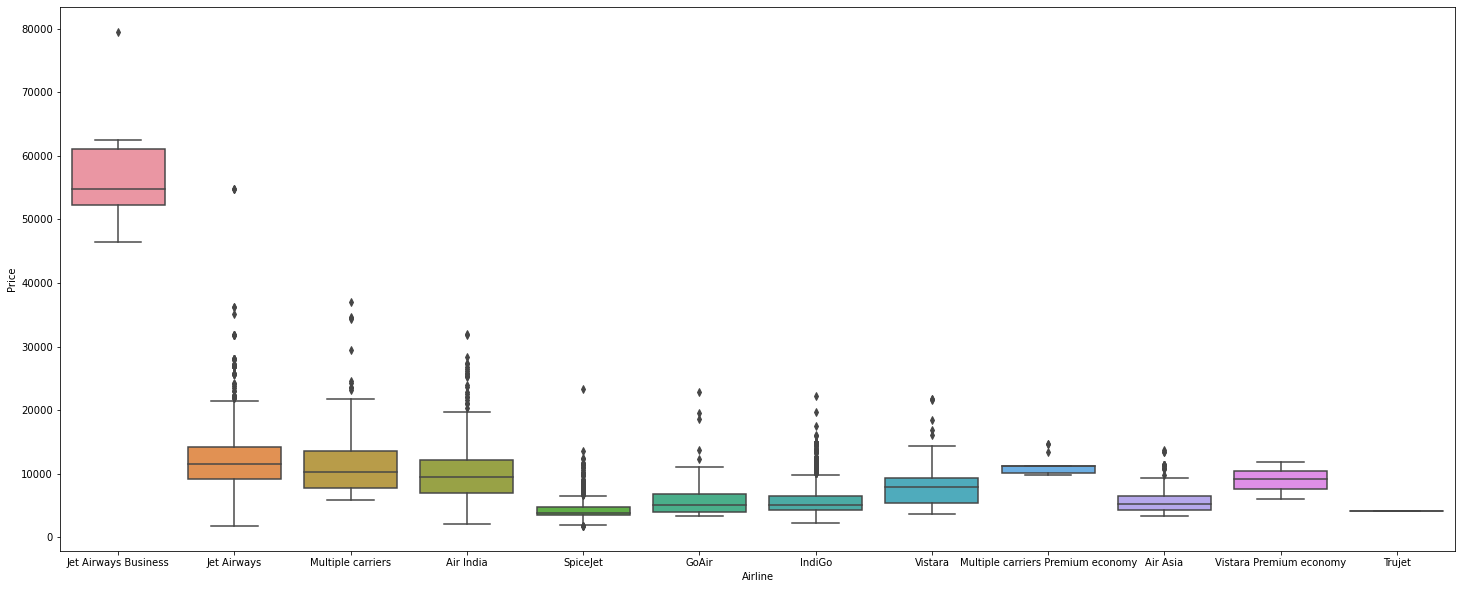

In [38]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))

From the graph above, we can conclude that Jet Airways Business has the highest Price. Whereas other flights have a similar median price.

### Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

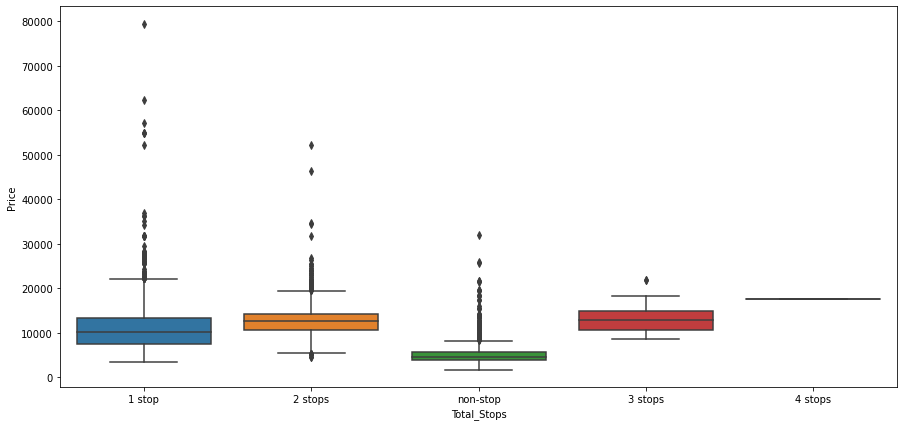

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(y='Price', x='Total_Stops', data=train_data.sort_values('Price', ascending=False))

The graph above shows that flights with 1 stop may be more expensive. Whereas flights with 4 stops are highly likely to have the same price.

### Implementing OneHotEncoding on Nominal Data

In [40]:
len(cat_data['Airline'].unique())

12

In [41]:
# OneHotEncoding on Airline Column
Airlines = pd.get_dummies(cat_data['Airline'], drop_first = True)
Airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
cat_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

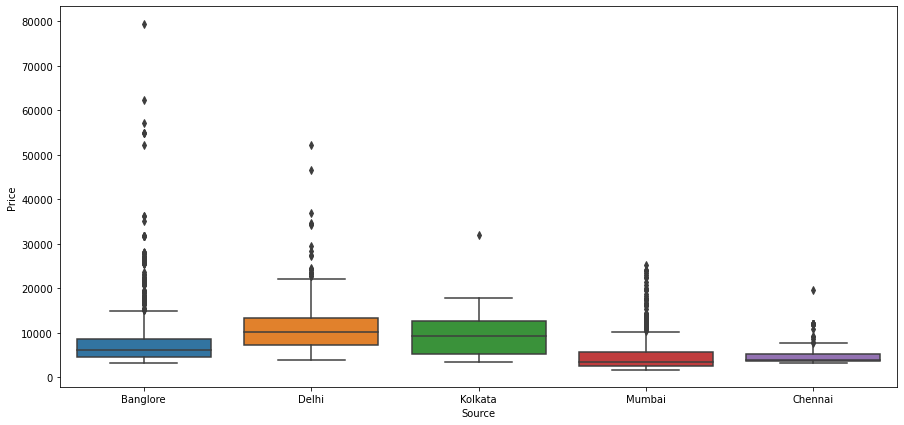

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(y='Price', x='Source', data=train_data.sort_values('Price', ascending=False))

Flighs from Bangalore has the highest fluctuation in price. Delhi has the highest median. Flights from Kolkata are least likely to fluctuate.

In [44]:
# OneHotEncoding on Source Column
Source = pd.get_dummies(cat_data['Source'], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
cat_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

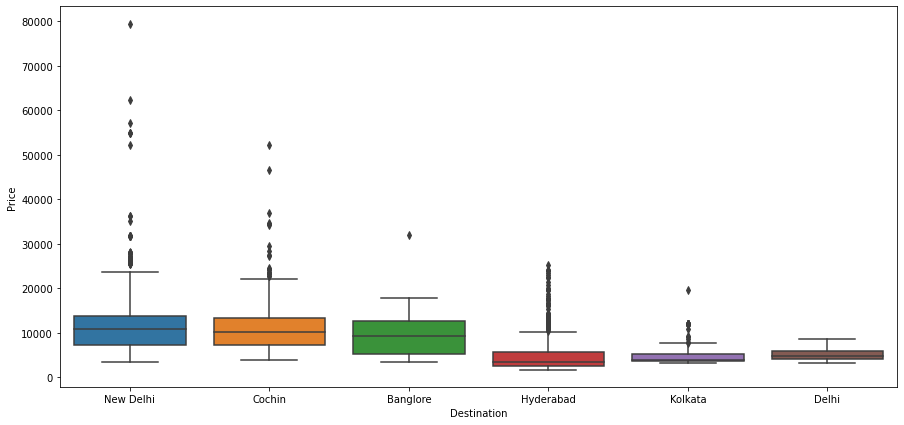

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(y='Price', x='Destination', data=train_data.sort_values('Price', ascending=False))

In [47]:
# OneHotEncoding on Destination Column
Destination = pd.get_dummies(cat_data['Destination'], drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Splitting Routes

In [48]:
cat_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [49]:
# Separating all destinations (Max 5)
cat_data['Route_1'] = cat_data['Route'].str.split('→').str[0]
cat_data['Route_2'] = cat_data['Route'].str.split('→').str[1]
cat_data['Route_3'] = cat_data['Route'].str.split('→').str[2]
cat_data['Route_4'] = cat_data['Route'].str.split('→').str[3]
cat_data['Route_5'] = cat_data['Route'].str.split('→').str[4]

C:\Users\tuans\AppData\Local\Temp/ipykernel_18872/1022656115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Route_1'] = cat_data['Route'].str.split('→').str[0]
C:\Users\tuans\AppData\Local\Temp/ipykernel_18872/1022656115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Route_2'] = cat_data['Route'].str.split('→').str[1]
C:\Users\tuans\AppData\Local\Temp/ipykernel_18872/1022656115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [50]:
cat_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [51]:
# Remove Route column as it's not needed anymore
drop_column(cat_data, 'Route')

C:\Users\tuans\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
cat_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
cat_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [54]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [55]:
# Replace NA with None in Route_3, Route_4 & Route_5
for i in ['Route_3', 'Route_4', 'Route_5']:
    cat_data[i].fillna('None', inplace = True)

C:\Users\tuans\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [56]:
cat_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [57]:
for i in cat_data.columns:
    print('{} has total {} different values'.format(i, len(cat_data[i].value_counts())))

Airline has total 12 different values
Source has total 5 different values
Destination has total 6 different values
Total_Stops has total 5 different values
Additional_Info has total 10 different values
Route_1 has total 5 different values
Route_2 has total 45 different values
Route_3 has total 30 different values
Route_4 has total 14 different values
Route_5 has total 6 different values


OneHotEncoder cannot be applied to Routes as due to large number of values. Hence, LabelEncoder will be implemented.

In [58]:
# LabelEncoder on Routes Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    cat_data[i] = encoder.fit_transform(cat_data[i])

C:\Users\tuans\AppData\Local\Temp/ipykernel_18872/789068122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = encoder.fit_transform(cat_data[i])


In [61]:
cat_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
# Drop Additional_Info column as it isn't relevant and mainly consists of 'No info' 
drop_column(cat_data,'Additional_Info')

C:\Users\tuans\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
cat_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# Replace String with int
dict={'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [65]:
cat_data['Total_Stops'] = cat_data['Total_Stops'].map(dict)

C:\Users\tuans\AppData\Local\Temp/ipykernel_18872/2593773498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Total_Stops'] = cat_data['Total_Stops'].map(dict)


In [66]:
cat_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [67]:
# Concatenate dataframe
data_train = pd.concat([cat_data,Airlines,Source,Destination,train_data[cont_col]],axis=1)

In [68]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [69]:
# Drop first 3 columns
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [70]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [71]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Detect Outliers

In [72]:
# Function to plot distribution and box plots
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


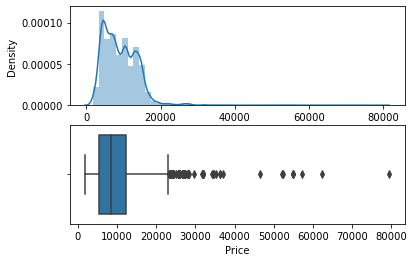

In [73]:
plot(data_train,'Price')

### Dealing with Outliers

In [74]:
# Removing Outliers over 40000
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


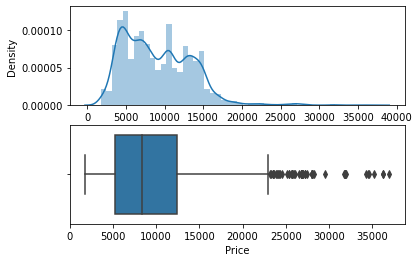

In [75]:
plot(data_train,'Price')

### Separate Dependent and Independent Variables

In [86]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [77]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [87]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [79]:
y.isnull().sum()

0

No Missing Data in X and Y. Hence, we can proceed to Feature Selection.

## Apply Feature Selection

In [88]:
# Feature Selection using Information Gain
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.16295356e+00, 2.03660870e+00, 2.74012552e+00, 2.32256855e+00,
       1.47982788e+00, 7.24296009e-01, 7.44589034e-01, 9.77556415e-02,
       6.57762382e-01, 9.41058784e-01, 0.00000000e+00, 5.89941378e-01,
       3.57548207e-03, 3.21223510e-01, 3.98904284e-04, 2.15775764e-01,
       0.00000000e+00, 1.70520682e-01, 1.54664260e+00, 8.77539855e-01,
       2.97298169e-01, 1.53231306e+00, 4.02489361e-01, 2.94149873e-01,
       1.67349702e-01, 3.85751933e-01, 1.09372097e+00, 8.61830148e-01,
       1.45141516e+00, 1.22574367e+00, 1.85708174e+00, 1.53073728e+00,
       1.79654346e+00, 1.06969675e+00])

In [89]:
imp_features = pd.DataFrame(mutual_info_classif(x,y),index=X.columns)
imp_features

,0
Total_Stops,2.150839
Route_1,2.057328
Route_2,2.808032
Route_3,2.272732
Route_4,1.490406
Route_5,0.783812
Air India,0.752414
GoAir,0.106322
IndiGo,0.686293
Jet Airways,0.937409


In [82]:
# Rank columns in order of importance
imp_features.columns = ['importance']
imp_features.sort_values(by='importance',ascending=False)

,importance
Route_2,2.800603
Route_3,2.296563
Total_Stops,2.134199
Route_1,2.073210
Arrival_Time_hour,1.846493
Duration_hour,1.795399
Arrival_Time_min,1.539539
Delhi,1.532699
Cochin,1.532301
Route_4,1.493915


As the Table above suggests, the most importance columns are Route_2, Route_3 and Total Stops. Whereas the least important columns are Trujet, Jet Airways Business and Vastara Premium Economy

## Developing ML Model

In [83]:
# Split Dataset into Test and Train set
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [102]:
import pickle

def prediction(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are: \n {} \n'.format(y_prediction))
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2 score: {} \n'.format(r2_score))
    
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump == 1:
        # Dump model using pickle to be re-used
        file = open('D:/tuansihan/06 Projects/02 Airline Ticket Pricing Prediction/model.pkl','wb')
        pickle.dump(model,file)

### Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9542134812386491
predictions are: 
 [ 6965.0375      5278.26       11233.93833333 ... 12194.24
 11416.567       3866.26666667] 

r2 score: 0.8005852068802723 

MAE: 1126.3821295812932
MSE: 3857131.5046056104
RMSE: 1963.9581219072902


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


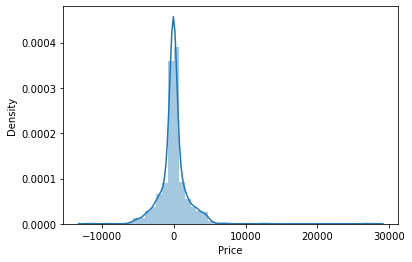

In [103]:
prediction(RandomForestRegressor(),1)

### Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

Training score : 0.6168989723593143
predictions are: 
 [ 7745.9323779   5684.59708793 11880.50829761 ... 10264.54116912
 12432.33244522  2907.91468899] 

r2 score: 0.6108366774207391 

MAE: 1930.6944662506535
MSE: 7527295.685913522
RMSE: 2743.591749133519


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


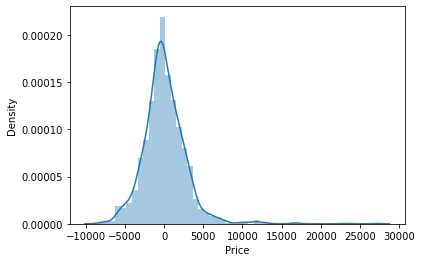

In [109]:
prediction(LinearRegression(),0)

### K-Nearest Neighbors

In [112]:
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.7892317574660772
predictions are: 
 [ 6845.6  5277.  11715.4 ... 11337.4 13298.   4408.8] 

r2 score: 0.6252887936631619 

MAE: 1727.8472625175477
MSE: 7247759.1881703315
RMSE: 2692.1662630993524


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


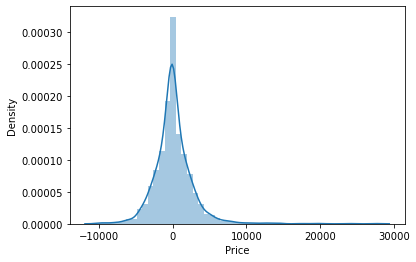

In [113]:
prediction(KNeighborsRegressor(),0)

### Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9669988086105379
predictions are: 
 [ 7229.   5277.  10953.  ... 12303.  11905.5  3625. ] 

r2 score: 0.6978747418293872 

MAE: 1311.5535407892685
MSE: 5843783.36930757
RMSE: 2417.3918526601287


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


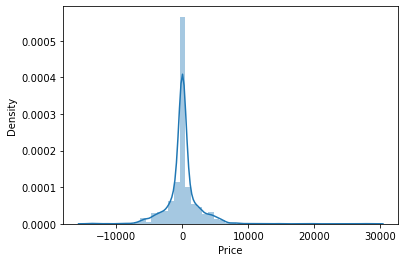

In [115]:
prediction(DecisionTreeRegressor(),0)

## Hyperparameter Tuning

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [123]:
rf_reg = RandomForestRegressor()

In [120]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [119]:
# Create the random grid

random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [124]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [128]:
rf_random = RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [131]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [133]:
prediction = rf_random.predict(X_test)

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

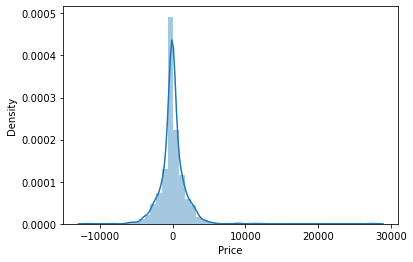

In [134]:
sns.distplot(y_test-prediction)

In [135]:
metrics.r2_score(y_test,prediction)

0.8256592982686966

In [136]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1078.1866709646024
MSE 3372142.06961628
RMSE 1836.3393122231741


The final accuracy of the model after hyperparameter tuning is up to 82.6%